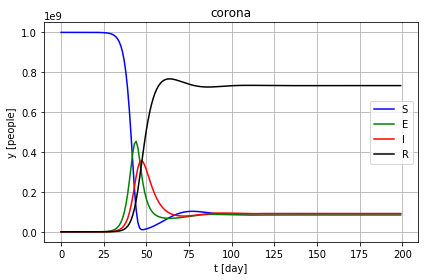

In [65]:

import numpy as np
import matplotlib.pyplot as plt


beta = 2.2
sigma = 1.0/4.6
xi = 1.0/40.0
mu = 0.0
nu = 0.0
gamma = 1.0/5.0
N = 10 ** 9 # 人口
# x = np.array(s,e,i)
x0 = np.array([N-100,100,0])
h = 1 # 1サイクルあたりの日数
T = 200 # 日数

# x = np.array(s,e,i,r)

def seirs(x):
    S = x[0]
    E = x[1]
    I = x[2]
    R = N-S-E-I
    dS = mu * N - beta * S * I / N + xi * R - nu * S
    dE = beta * S * I / N - sigma * E - nu * E
    dI = sigma * E - gamma * I - nu * I
    dx = np.array([dS,dE,dI])
    return dx

# t = np.linspace(0, 1, 1000)
t = np.zeros(T)# 日にち
S = np.zeros(T)
E = np.zeros(T)
I = np.zeros(T)
R = np.zeros(T)

x = x0
S[0] = x[0]
E[0] = x[1]
I[0] = x[2]
R[0] = N-x[0]-x[1]-x[2]

for i in range(1,T):
    t[i] = h * i
    dx = seirs(x)
    x = x + h * dx # Euler法 @todo:ルンゲクッタ法に変更
    S[i] = x[0]
    E[i] = x[1]
    I[i] = x[2]
    R[i] = N-x[0]-x[1]-x[2]
    # print(dx)

    

fig, ax = plt.subplots()

y1 = S
y2 = E 
y3 = I
y4 = R

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色
l1,l2,l3,l4 = "S","E","I","R"   # 各ラベル

ax.set_xlabel('t [day]')  # x軸ラベル
ax.set_ylabel('y [people]')  # y軸ラベル
ax.set_title("corona") # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(t, y1, color=c1, label=l1)
ax.plot(t, y2, color=c2, label=l2)
ax.plot(t, y3, color=c3, label=l3)
ax.plot(t, y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
# plt.savefig('hoge.png') # 画像の保存
plt.show()
   

